Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [52]:
NICKNAME = "agentWSS"

---

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [15]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x1 = x0 - f(x0) / fder(x0)
    iter = 1
    while abs(x1 - x0) >= eps and iter < maxiter:
        x0 = x1
        x1 = x0 - f(x0) / fder(x0)
        iter += 1
    if iter == maxiter:
        return None
    return x1, iter

In [16]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

Root: 1.0000000000139897


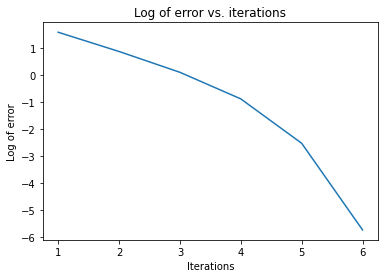

In [24]:
def f(x):
  return x**2 - 1

def fder(x):
  return 2*x

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
  x1 = x0 - f(x0) / fder(x0)
  iter = 1
  error = []
  while abs(x1 - x0) >= eps and iter < maxiter:
    error.append(abs(x1 - x0))
    x0 = x1
    x1 = x0 - f(x0) / fder(x0)
    iter += 1
    if iter == maxiter:
      return None, error
  return x1, error

x0 = 10
root, error = newton_iteration(f, fder, x0)
print(f'Root: {root}')

iterations = np.arange(1, len(error)+1)
plt.plot(iterations, np.log(error))
plt.xlabel('Iterations')
plt.ylabel('Log of error')
plt.title('Log of error vs. iterations')
plt.show()











# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [17]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    err = 1000
    i = 0

    while err >= eps and i < maxiter:
        x_next = x0 - m * f(x0) / fder(x0)
        err = abs(x_next - x0)
        x0 = x_next
        i += 1
    x, niter = float(x_next), i
    return x, niter

In [18]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [29]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**2,
                         lambda x: 4*(x**2 - 1)*x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    print(f"m = {m}: x = {xx}, nit = {nit}")

m = 1: x = 1.0000000009557763, nit = 31
m = 2: x = 1.0, nit = 6
m = 3: x = 1.000000000261376, nit = 30
m = 4: x = 2.0, nit = 10000
m = 5: x = 0.10304845948084518, nit = 10000
m = 6: x = 0.9249504459022733, nit = 10000


Предсказание о том, что число итерации будет наименьшим, когда кратность m = 2 верно. 

# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


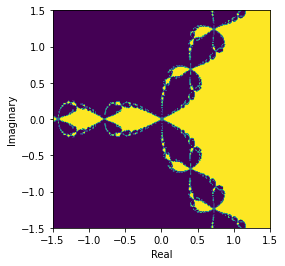

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1

def df(x):
    return 3*x**2

def newton_iteration(x):
    return x - f(x)/df(x)

X, Y = np.meshgrid(np.linspace(-1.5, 1.5, 300), np.linspace(-1.5, 1.5, 300))
Z = X + Y*1j

roots = np.zeros(Z.shape, dtype=np.complex64)

for i in range(20):
    Z = newton_iteration(Z)
    roots[np.isclose(Z, 1, atol=1e-6, rtol=1e-6)] = 1
    roots[np.isclose(Z, (-0.5 + 0.5j*np.sqrt(3)), atol=1e-6, rtol=1e-6)] = -0.5 + 0.5j*np.sqrt(3)
    roots[np.isclose(Z, (-0.5 - 0.5j*np.sqrt(3)), atol=1e-6, rtol=1e-6)] = -0.5 - 0.5j*np.sqrt(3)

plt.imshow(roots.real, extent=(-1.5, 1.5, -1.5, 1.5))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [47]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    X = X0
    for i in range(maxiter):
        F_value = F(X)
        if np.linalg.norm(F_value) < eps:
            return X, i
        J_value = jcb(X)
        delta = np.linalg.solve(J_value, -F_value)
        X = X + delta
    
    return None, maxiter

In [48]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [49]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    x, y, z = X
    return np.array([[2*x, 2*y, 2*z],
                     [y, x, z],
                     [1, 1, 0]])

In [50]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [51]:
# more testing in this cell, keep it intact
